### Base Model 001

> Learnings
1. The data is messy, a few columns are missing about 20% data, what to do in this case?
2. RF models needs some kinda encoding to deal with categorical data with missing values. 
3. Catboost model considers string and float, but missing values needs to be converted to either. 

In [44]:
## Random Forest Regressor class
%run setup/rf_model_regression.ipynb

In [50]:
## Catboost regressor class
%run setup/catboost_regression.ipynb

In [21]:
## utils functions
%run extras/lab_utils_cls.ipynb

In [14]:
import pandas as pd
import numpy as np

In [17]:
test_file_loc = "https://raw.githubusercontent.com/chrisdmell/DataScience/master/data_dump/01_cipla_ds_challenge/test.csv"
train_file_loc = "https://raw.githubusercontent.com/chrisdmell/DataScience/master/data_dump/01_cipla_ds_challenge/train.csv"

In [18]:
df_insurance = Utils.load_data(test_file_loc)
df_insurance_train = Utils.load_data(train_file_loc)

In [7]:
Utils.df_attributes(df_insurance)  # test

Dataframe Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  20000 non-null  object 
 1   Name                         20000 non-null  object 
 2   Gender                       19969 non-null  object 
 3   Age                          20000 non-null  int64  
 4   Income (USD)                 19250 non-null  float64
 5   Income Stability             19187 non-null  object 
 6   Profession                   20000 non-null  object 
 7   Type of Employment           15311 non-null  object 
 8   Location                     20000 non-null  object 
 9   Loan Amount Request (USD)    20000 non-null  float64
 10  Current Loan Expenses (USD)  19917 non-null  float64
 11  Expense Type 1               20000 non-null  object 
 12  Expense Type 2               20000 non-null  object 
 13  D

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Income (USD)'}>,
        <AxesSubplot:title={'center':'Loan Amount Request (USD)'}>],
       [<AxesSubplot:title={'center':'Current Loan Expenses (USD)'}>,
        <AxesSubplot:title={'center':'Dependents'}>,
        <AxesSubplot:title={'center':'Credit Score'}>],
       [<AxesSubplot:title={'center':'No. of Defaults'}>,
        <AxesSubplot:title={'center':'Property ID'}>,
        <AxesSubplot:title={'center':'Property Age'}>],
       [<AxesSubplot:title={'center':'Property Type'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

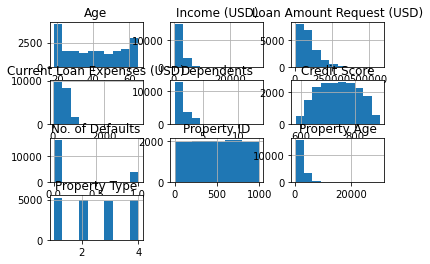

In [8]:
Utils.hist_flt_int(df_insurance)  ## test

In [19]:
Utils.df_attributes(df_insurance_train)

Dataframe Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  D

<ipython-input-21-0d24856292bf>:234: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  return dataset[hist_cols].hist(ax = ax)


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Income (USD)'}>,
        <AxesSubplot:title={'center':'Loan Amount Request (USD)'}>,
        <AxesSubplot:title={'center':'Current Loan Expenses (USD)'}>],
       [<AxesSubplot:title={'center':'Dependents'}>,
        <AxesSubplot:title={'center':'Credit Score'}>,
        <AxesSubplot:title={'center':'No. of Defaults'}>,
        <AxesSubplot:title={'center':'Property ID'}>],
       [<AxesSubplot:title={'center':'Property Age'}>,
        <AxesSubplot:title={'center':'Property Type'}>,
        <AxesSubplot:title={'center':'Co-Applicant'}>,
        <AxesSubplot:title={'center':'Property Price'}>],
       [<AxesSubplot:title={'center':'Loan Sanction Amount (USD)'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

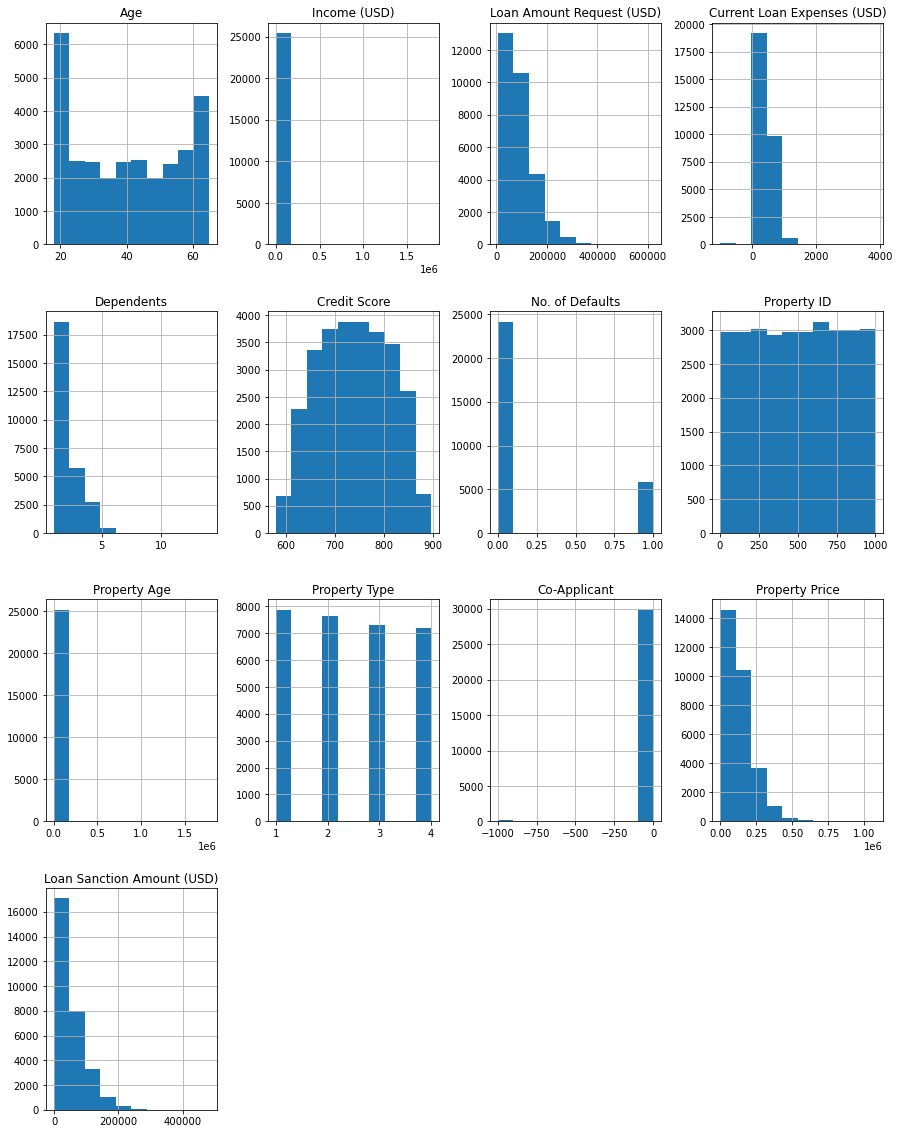

In [22]:
Utils.hist_flt_int(df_insurance_train)  ## 

'Customer ID' - Unique identification <br>
'Name' - Customer name <br>
'Gender' - Gender <br>
'Age' - Age <br>
'Income (USD)' - Income  <br>
'Income Stability' - Income stability <br>
'Profession' - Profession <br>
'Type of Employment' - Type of employment <br>
'Location' - Current resident location <BR>
'Loan Amount Request (USD)' - Loan amount requested <br>
'Current Loan Expenses (USD)' - Monthly Loan EMI <br>
'Expense Type 1' - Type of expense customer spends monthly  <br>
'Expense Type 2' - Type of expense customer spends monthly <br>
'Dependents' - Spouce/parents/siblings/children <br>
'Credit Score' - Credit score <br>
'No. of Defaults' - No of time customer has defaulted - loan or emi<br>
'Has Active Credit Card' - has credit card<br>
'Property ID' -  identification of property<br>
'Property Age' - age of property <br>
'Property Type' - Type of proprty<br>
'Property Location' - property location <br>
'Co-Applicant' - 
'Property Price'

###  1. Baseline Model

1. When we look at the histogram there are quite a few outliers.
2. Property age/Co-applicant/ Property age and current expense

In [23]:
df_insurance_train.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [24]:
df_insurance_train[['Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults']].head()

,Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults
0,241.08,N,N,3.0,809.44,0
1,495.81,N,Y,1.0,780.40,0
2,171.95,N,Y,1.0,833.15,0
3,298.54,N,Y,2.0,832.70,1
4,491.41,N,Y,NaN,745.55,1


In [33]:
columns_to_keep = [ 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)']

1. Lets consider these tables without filtering or cleaning the data, and lets deploy a RF regressor. As RF can handle missing data, we dnt have to worry about it now. <br>

Random forest does handle missing data and there are two distinct ways it does so:

1) Without imputation of missing data, but providing inference. 
2) Imputing the data. Imputed data is then used for inference.

In [26]:
rf_model = RF_regressor.new_instance()

In [27]:
help(RF_regressor.model_run)

Help on function model_run in module __main__:

model_run(self, df, var_dict, other_dict={})
    self : rf regressor model
    df : dataframe
    var_dict : model variables dict - var_dict["independant"], var_dict["dependant"]
    other_dict : other dict if needed, set to {} default



In [37]:
columns_to_keep = [ 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)']
var_dict = {}
var_dict["independant"] = ['Gender','Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price']
var_dict["dependant"]   = ["Loan Sanction Amount (USD)"]
features_to_keep = df_insurance_train[columns_to_keep]
features_to_keep.dropna(inplace =  True)
rf_model_output = rf_model.model_run(features_to_keep, var_dict)

<ipython-input-37-d2f66000a237>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_to_keep.dropna(inplace =  True)


ValueError: could not convert string to float: 'Low'

RF doesn't fit string values. We need to either __OneHotEncoding__ or __LabelEncoder___ <br>
Another way to solve this is to use __CATBOOST__ <br>
Catboost needs all values in string or integer, and all non values converted to either formats <br>

In [51]:
cat_model = catboost_regressor.new_instance()

In [52]:
help(catboost_regressor.model_run)

Help on function model_run in module __main__:

model_run(self, df, var_dict, other_dict={})
    self : rf regressor model
    df : dataframe
    var_dict : model variables dict - var_dict["independant"], var_dict["dependant"]
    other_dict : other dict if needed, set to {} default



In [64]:
%run setup/catboost_regression.ipynb

In [65]:
columns_to_keep = [ 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)']
var_dict = {}
var_dict["independant"] = ['Gender','Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price']

cat_features = ['Gender',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Expense Type 1', 'Expense Type 2', 'Dependents',
       'No. of Defaults', 'Has Active Credit Card', 
       'Property Type', 'Property Location', 'Co-Applicant']

var_dict["dependant"]   = ["Loan Sanction Amount (USD)"]
features_to_keep = df_insurance_train[columns_to_keep]

features_to_keep[cat_features] = features_to_keep[cat_features].astype(str)

features_to_keep.dropna(inplace =  True)  ## this cannot be done in test becauase we need all the 20K samples

params = {"cat_features": cat_features, "loss_function": "RMSE", "iterations" : 100}

cat_model = catboost_regressor.new_instance(params)


rf_model_output = cat_model.model_run(features_to_keep, var_dict, )

C:\Users\chris.dmello\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-65-c82ffd455011>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_to_keep.dropna(inplace =  True)


Learning rate set to 0.374508
0:	learn: 39196.9053087	total: 36.8ms	remaining: 3.64s
1:	learn: 32395.9844576	total: 76.2ms	remaining: 3.73s
2:	learn: 28631.9438552	total: 117ms	remaining: 3.77s
3:	learn: 26474.6396757	total: 155ms	remaining: 3.73s
4:	learn: 25299.1750208	total: 196ms	remaining: 3.72s
5:	learn: 24730.7982920	total: 235ms	remaining: 3.69s
6:	learn: 24422.5404388	total: 273ms	remaining: 3.63s
7:	learn: 24190.1078524	total: 310ms	remaining: 3.57s
8:	learn: 24068.3670000	total: 348ms	remaining: 3.52s
9:	learn: 23944.2928774	total: 385ms	remaining: 3.47s
10:	learn: 23851.8759078	total: 438ms	remaining: 3.54s
11:	learn: 23791.0398854	total: 484ms	remaining: 3.55s
12:	learn: 23674.7608663	total: 528ms	remaining: 3.53s
13:	learn: 23648.0866479	total: 563ms	remaining: 3.46s
14:	learn: 23590.6932031	total: 601ms	remaining: 3.4s
15:	learn: 23584.4901689	total: 647ms	remaining: 3.4s
16:	learn: 23551.8472762	total: 689ms	remaining: 3.36s
17:	learn: 23541.7755030	total: 729ms	remaini

#### BaseLine Values

In [66]:
rf_model_output

{'mae': 13623.96153872796,
 'mse': 651899720.4525563,
 'rmse': 25532.326969012367,
 'r2': 0.7118384650500402,
 'model': <catboost.core.CatBoostRegressor at 0x28a347a3670>,
 'y_test':        Loan Sanction Amount (USD)
 27878                   112396.14
 1174                     16320.53
 5411                         0.00
 2935                         0.00
 26976                    83606.04
 ...                           ...
 8745                         0.00
 5314                     52992.12
 17393                    23151.19
 21129                    79007.50
 13990                    30866.39
 
 [5894 rows x 1 columns],
 'y_pred': array([85379.32313138, 13974.73743951, 21860.28431481, ...,
        19890.62736184, 72112.42206112, 23145.87375341]),
 'model_score': -10430.784234823781}

[112396.14,
 16320.53,
 0.0,
 0.0,
 83606.04,
 55904.74,
 63859.4,
 0.0,
 26228.53,
 174515.98,
 23958.23,
 101587.7,
 50890.05,
 84632.98,
 127875.84,
 0.0,
 23411.33,
 170158.1,
 118840.62,
 0.0,
 22863.04,
 16663.27,
 176312.0,
 74757.33,
 44658.82,
 25254.53,
 30512.44,
 47686.7,
 48919.29,
 0.0,
 70591.74,
 161252.82,
 59995.14,
 0.0,
 0.0,
 101583.82,
 105925.06,
 76138.86,
 38392.58,
 108297.99,
 15034.04,
 118874.94,
 28417.27,
 0.0,
 96589.66,
 49148.98,
 0.0,
 0.0,
 38258.4,
 41759.72,
 72738.78,
 20302.03,
 0.0,
 0.0,
 0.0,
 92196.34,
 62089.37,
 115398.55,
 45591.53,
 123585.41,
 0.0,
 0.0,
 0.0,
 0.0,
 55138.08,
 200575.2,
 0.0,
 0.0,
 0.0,
 59538.29,
 99397.14,
 257393.33,
 52376.03,
 72828.06,
 7702.68,
 17892.81,
 103561.09,
 147490.4,
 0.0,
 65512.25,
 85687.09,
 12272.16,
 62316.01,
 95410.63,
 134638.55,
 23606.84,
 46548.1,
 47682.77,
 0.0,
 143337.07,
 0.0,
 108570.8,
 59295.34,
 77125.86,
 152850.51,
 0.0,
 0.0,
 0.0,
 80003.22,
 26662.27,
 43592.76,
 94161.51,
 1

In [82]:
pred_acutal_df = pd.DataFrame({"y_pred" : (rf_model_output["y_pred"]), "y_test" : list(rf_model_output["y_test"]["Loan Sanction Amount (USD)"])})
pred_acutal_df.head()

,y_pred,y_test
0,85379.323131,112396.14
1,13974.737440,16320.53
2,21860.284315,0.00
3,76232.187343,0.00
4,69014.560922,83606.04


Lets predict it for the test set

In [73]:
columns_to_keep = [ 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price']

cat_features = ['Gender',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Expense Type 1', 'Expense Type 2', 'Dependents',
       'No. of Defaults', 'Has Active Credit Card', 
       'Property Type', 'Property Location', 'Co-Applicant']


features_to_keep_test = df_insurance[columns_to_keep]

features_to_keep_test[cat_features] = features_to_keep_test[cat_features].astype(str)

features_to_keep_test.dropna(inplace =  True)  ## this cannot be done in test becauase we need all the 20K samples


# params = {"cat_features": cat_features, "loss_function": "RMSE", "iterations" : 100}
# cat_model = catboost_regressor.new_instance(params)
# cat_model_output = cat_model.model_run(features_to_keep, var_dict, )

C:\Users\chris.dmello\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-73-fc4acd91a2a7>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_to_keep_test.dropna(inplace =  True)  ## this cannot be done in test becauase we need all the 20K samples


In [74]:
values_to_send = rf_model_output["model"].predict(features_to_keep_test)
values_to_send
## Cannot predict because data no clean. 

CatBoostError: Bad value for num_feature[non_default_doc_idx=137,feature_idx=19]="?": Cannot convert 'b'?'' to float

There is  __?__ in the data which cannot be converted to string or integer. So basically there is a bit of data cleaning to do. 
<br>Write a data cleaning module.

1. Count Values and pandas concat to a dataframe 

[Catboost_1](https://towardsdatascience.com/catboost-regression-in-6-minutes-3487f3e5b329)<br>

### 20210620 
> After data clean trying out the same catboost model with no changes or parameters.

In [5]:
## Catboost regressor class
%run setup/catboost_regression.ipynb

## utils functions
%run extras/lab_utils_cls.ipynb

## data cleaning - imputing etc
%run extras/data_clean_util.ipynb

In [40]:
test_file_loc = "insurance_cleaned_test.csv"
train_file_loc = "insurance_cleaned_train.csv"

df_insurance = Utils.load_data(test_file_loc)
df_insurance_train = Utils.load_data(train_file_loc)


In [4]:
columns_to_keep = [ 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession',  'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)']
var_dict = {}
var_dict["independant"] = ['Gender','Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price']

cat_features = ['Gender',
       'Income Stability', 'Profession',  'Location',
       'Expense Type 1', 'Expense Type 2', 'Dependents',
       'No. of Defaults', 'Has Active Credit Card', 
       'Property Type', 'Property Location', 'Co-Applicant']

var_dict["dependant"]   = ["Loan Sanction Amount (USD)"]
features_to_keep = df_insurance_train[columns_to_keep]

features_to_keep[cat_features] = features_to_keep[cat_features].astype(str)

# features_to_keep.dropna(inplace =  True)  ## this cannot be done in test becauase we need all the 20K samples

params = {"cat_features": cat_features, "loss_function": "RMSE", "iterations" : 100}

cat_model = catboost_regressor.new_instance(params)


cat_model_output_002 = cat_model.model_run(features_to_keep, var_dict, )

CatBoostError: C:/Program Files (x86)/Go Agent/pipelines/BuildMaster/catboost.git/catboost/private/libs/target/target_converter.cpp:53: NaN values are not supported for target

_CatBoostError: C:/Program Files (x86)/Go Agent/pipelines/BuildMaster/catboost.git/catboost/private/libs/target/target_converter.cpp:53: NaN values are not supported for target_

__Had loaded the original file. So now we know catboost doesnt allow null in target values.__

In [9]:
x = DataClean.missing_percentage(df_insurance_train)
y = DataClean.missing_percentage(df_insurance)

|    | features                    |   null_count |   total |   missing_percent |
|---:|:----------------------------|-------------:|--------:|------------------:|
|  0 | Unnamed: 0                  |            0 |   30000 |                 0 |
| 13 | Income (USD)                |            0 |   30000 |                 0 |
| 23 | Property Price              |            0 |   30000 |                 0 |
| 22 | Co-Applicant                |            0 |   30000 |                 0 |
| 21 | Property Type               |            0 |   30000 |                 0 |
| 20 | Property Age                |            0 |   30000 |                 0 |
| 19 | Property ID                 |            0 |   30000 |                 0 |
| 18 | No. of Defaults             |            0 |   30000 |                 0 |
| 17 | Credit Score                |            0 |   30000 |                 0 |
| 16 | Dependents                  |            0 |   30000 |                 0 |
| 15 | Current L

In [10]:
columns_to_keep = [ 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession',  'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)']
var_dict = {}
var_dict["independant"] = ['Gender','Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price']

cat_features = ['Gender',
       'Income Stability', 'Profession',  'Location',
       'Expense Type 1', 'Expense Type 2', 'Dependents',
       'No. of Defaults', 'Has Active Credit Card', 
       'Property Type', 'Property Location', 'Co-Applicant']

var_dict["dependant"]   = ["Loan Sanction Amount (USD)"]
features_to_keep = df_insurance_train[columns_to_keep]

features_to_keep[cat_features] = features_to_keep[cat_features].astype(str)

# features_to_keep.dropna(inplace =  True)  ## this cannot be done in test becauase we need all the 20K samples

params = {"cat_features": cat_features, "loss_function": "RMSE", "iterations" : 100}

cat_model = catboost_regressor.new_instance(params)


cat_model_output_002 = cat_model.model_run(features_to_keep, var_dict, )

C:\Users\chris.dmello\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Learning rate set to 0.390921
0:	learn: 38855.0977727	total: 220ms	remaining: 21.8s
1:	learn: 33857.8463730	total: 248ms	remaining: 12.2s
2:	learn: 29084.9594944	total: 281ms	remaining: 9.07s
3:	learn: 27185.9819698	total: 310ms	remaining: 7.43s
4:	learn: 25935.2763461	total: 344ms	remaining: 6.54s
5:	learn: 25332.7819740	total: 381ms	remaining: 5.96s
6:	learn: 24991.5123923	total: 426ms	remaining: 5.65s
7:	learn: 24683.4271357	total: 476ms	remaining: 5.47s
8:	learn: 24500.2484713	total: 517ms	remaining: 5.23s
9:	learn: 24375.3074418	total: 609ms	remaining: 5.48s
10:	learn: 24255.8094276	total: 649ms	remaining: 5.25s
11:	learn: 24173.7936456	total: 682ms	remaining: 5s
12:	learn: 24083.4059264	total: 714ms	remaining: 4.78s
13:	learn: 23960.5264522	total: 741ms	remaining: 4.55s
14:	learn: 23906.8423674	total: 774ms	remaining: 4.38s
15:	learn: 23886.5100541	total: 804ms	remaining: 4.22s
16:	learn: 23868.1346488	total: 838ms	remaining: 4.09s
17:	learn: 23791.2324216	total: 867ms	remaining:

In [11]:
cat_model_output_002

{'mae': 12648.382213915878,
 'mse': 573070361.708635,
 'rmse': 23938.88806332982,
 'r2': 0.750245654842272,
 'model': <catboost.core.CatBoostRegressor at 0x1bec23b8520>,
 'y_test':        Loan Sanction Amount (USD)
 2308                         0.00
 22404                    62192.62
 23397                    99950.54
 25058                        0.00
 2664                         0.00
 ...                           ...
 3211                     59746.65
 9355                     26007.43
 28201                        0.00
 19705                    42416.56
 28313                    32058.35
 
 [7500 rows x 1 columns],
 'y_pred': array([-2328.78654641, 57478.99997394, 84242.80258518, ...,
        47687.72590421, 38557.10884954, 24946.2888529 ]),
 'model_score': -13139.591892152208}

Test001


In [12]:
{'mae': 13623.96153872796,
 'mse': 651899720.4525563,
 'rmse': 25532.326969012367,
 'r2': 0.7118384650500402}

{'mae': 13623.96153872796,
 'mse': 651899720.4525563,
 'rmse': 25532.326969012367,
 'r2': 0.7118384650500402}

Test002

After some data cleaning the values have reduced a little but not very signifincat

In [62]:
## model 2
{'mae': 12648.382213915878,
 'mse': 573070361.708635,
 'rmse': 23938.88806332982,
 'r2': 0.750245654842272}

{'mae': 12648.382213915878,
 'mse': 573070361.708635,
 'rmse': 23938.88806332982,
 'r2': 0.750245654842272}

__r2_score - from hackerearth - 79.53  <20210620 1726>__

In [15]:
columns_to_keep = [ 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession',  'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price']
features_to_predict_df = df_insurance[columns_to_keep]
features_to_predict_df.head()

,Gender,Age,Income (USD),Income Stability,Profession,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,F,47,3472.69,Low,Commercial associate,Semi-Urban,137088.98,396.72,N,N,2.000000,799.140000,0,Unpossessed,3472.69,2,Urban,1,236644.5
1,F,57,1184.84,Low,Working,Rural,104771.59,463.76,Y,Y,2.000000,833.310000,0,Unpossessed,1184.84,1,Rural,1,142357.3
2,F,52,1266.27,Low,Working,Semi-Urban,176684.91,493.15,N,Y,3.000000,627.440000,0,Unpossessed,1266.27,1,Urban,1,300991.24
3,M,65,1369.72,High,Pensioner,Rural,97009.18,446.15,N,Y,2.000000,833.200000,0,Inactive,1369.72,1,Semi-Urban,0,125612.1
4,F,60,1939.23,High,Pensioner,Urban,109980.00,370.10,N,N,2.251246,738.821538,0,missing_value,1939.23,4,Semi-Urban,1,180908.0


In [ ]:
features_to_predict_df

In [16]:
y_pred = cat_model_output_002["model"].predict(features_to_predict_df)

CatBoostError: Invalid type for cat_feature[non-default value idx=0,feature_idx=10]=2.0 : cat_features must be integer or string, real number values and NaN values should be converted to string.

In [19]:
y_ = DataClean.missing_percentage(features_to_keep)

|    | features                    |   null_count |   total |   missing_percent |
|---:|:----------------------------|-------------:|--------:|------------------:|
|  0 | Gender                      |            0 |   30000 |                 0 |
|  1 | Age                         |            0 |   30000 |                 0 |
| 18 | Property Price              |            0 |   30000 |                 0 |
| 17 | Co-Applicant                |            0 |   30000 |                 0 |
| 16 | Property Location           |            0 |   30000 |                 0 |
| 15 | Property Type               |            0 |   30000 |                 0 |
| 14 | Property Age                |            0 |   30000 |                 0 |
| 13 | Has Active Credit Card      |            0 |   30000 |                 0 |
| 12 | No. of Defaults             |            0 |   30000 |                 0 |
| 11 | Credit Score                |            0 |   30000 |                 0 |
| 10 | Dependent

In [18]:
y = DataClean.missing_percentage(features_to_predict_df)

|    | features                    |   null_count |   total |   missing_percent |
|---:|:----------------------------|-------------:|--------:|------------------:|
|  0 | Gender                      |            0 |   20000 |                 0 |
| 10 | Dependents                  |            0 |   20000 |                 0 |
| 17 | Co-Applicant                |            0 |   20000 |                 0 |
| 16 | Property Location           |            0 |   20000 |                 0 |
| 15 | Property Type               |            0 |   20000 |                 0 |
| 14 | Property Age                |            0 |   20000 |                 0 |
| 13 | Has Active Credit Card      |            0 |   20000 |                 0 |
| 12 | No. of Defaults             |            0 |   20000 |                 0 |
| 11 | Credit Score                |            0 |   20000 |                 0 |
|  9 | Expense Type 2              |            0 |   20000 |                 0 |
|  1 | Age      

In [47]:
features_to_predict_df.columns

Index(['Gender', 'Age', 'Income (USD)', 'Income Stability', 'Profession',
       'Location', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property Age',
       'Property Type', 'Property Location', 'Co-Applicant', 'Property Price'],
      dtype='object')

In [48]:
features_to_keep.columns

Index(['Gender', 'Age', 'Income (USD)', 'Income Stability', 'Profession',
       'Location', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property Age',
       'Property Type', 'Property Location', 'Co-Applicant', 'Property Price',
       'Loan Sanction Amount (USD)'],
      dtype='object')

In [49]:
features_to_keep.dtypes

Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Location                        object
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Expense Type 1                  object
Expense Type 2                  object
Dependents                      object
Credit Score                   float64
No. of Defaults                 object
Has Active Credit Card          object
Property Age                   float64
Property Type                   object
Property Location               object
Co-Applicant                    object
Property Price                 float64
Loan Sanction Amount (USD)     float64
dtype: object

In [ ]:
cat_features = ['Gender',
       'Income Stability', 'Profession',  'Location',
       'Expense Type 1', 'Expense Type 2', 'Dependents',
       'No. of Defaults', 'Has Active Credit Card', 
       'Property Type', 'Property Location', 'Co-Applicant']

In [50]:
features_to_predict_df.dtypes

Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Location                        object
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Expense Type 1                  object
Expense Type 2                  object
Dependents                      object
Credit Score                   float64
No. of Defaults                 object
Has Active Credit Card          object
Property Age                   float64
Property Type                   object
Property Location               object
Co-Applicant                    object
Property Price                  object
dtype: object

In [41]:
columns_to_keep = [ 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession',  'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price']
features_to_predict_df = df_insurance[columns_to_keep]

cat_features = ['Gender',
       'Income Stability', 'Profession',  'Location',
       'Expense Type 1', 'Expense Type 2', 'Dependents',
       'No. of Defaults', 'Has Active Credit Card', 
       'Property Type', 'Property Location', 'Co-Applicant']
features_to_predict_df[cat_features] = features_to_predict_df[cat_features].astype(str)

features_to_predict_df.head()

C:\Users\chris.dmello\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Gender,Age,Income (USD),Income Stability,Profession,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,M,65,1369.72,High,Pensioner,Rural,97009.18,446.15,N,Y,2.0,833.200000,0,Inactive,1369.72,1,Semi-Urban,0,125612.1
1,F,59,2944.81,Low,Working,Semi-Urban,31465.78,153.10,Y,Y,2.0,620.580000,0,Inactive,2944.81,1,Semi-Urban,0,51075.31
2,M,29,2183.59,Low,Commercial associate,Semi-Urban,53651.03,216.60,N,Y,3.0,653.000000,0,Unpossessed,2183.59,1,Semi-Urban,0,79681.39
3,F,60,5591.39,missing_value,Pensioner,Urban,251463.83,868.00,N,Y,1.0,851.870000,0,Active,5591.39,1,Semi-Urban,0,438663.7
4,M,18,2469.80,Low,Commercial associate,Semi-Urban,141894.98,483.61,N,Y,2.0,738.821538,0,Unpossessed,2469.80,3,Urban,0,252364.12


In [45]:
## unique is a method here
features_to_predict_df["Co-Applicant"].unique()

array(['0', '1'], dtype=object)

In [46]:
features_to_predict_df["Co-Applicant"].value_counts()

1    17081
0     2919
Name: Co-Applicant, dtype: int64

__? escapet this character__

In [51]:
features_to_predict_df["Property Price"].value_counts()

?            168
60060.83       2
110103.62      2
77441.22       2
101012.42      2
            ... 
142590.54      1
91955.81       1
122847.14      1
247633.79      1
111051.38      1
Name: Property Price, Length: 19824, dtype: int64

In [53]:
features_to_predict_df[features_to_predict_df["Property Price"] == "?"]

,Gender,Age,Income (USD),Income Stability,Profession,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price
137,F,41,1345.250000,Low,Working,Semi-Urban,16671.30,119.88,Y,N,3.0,624.70,0,Unpossessed,1345.250000,4,Rural,0,?
450,M,65,2536.995394,High,Pensioner,Semi-Urban,27123.57,146.04,Y,Y,2.0,817.81,0,Inactive,2534.102003,1,Urban,0,?
456,F,56,2536.995394,Low,Working,Semi-Urban,26337.90,252.32,Y,N,2.0,641.66,0,Inactive,2534.102003,3,Semi-Urban,0,?
865,M,61,3156.220000,High,Pensioner,Urban,74123.35,446.20,N,Y,1.0,873.80,0,Active,3156.220000,3,Urban,0,?
910,F,65,3471.440000,High,Pensioner,Semi-Urban,67952.15,303.35,Y,Y,2.0,819.32,0,Active,2534.102003,4,Urban,0,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19810,F,18,2582.980000,Low,Commercial associate,Semi-Urban,120341.35,547.53,Y,Y,1.0,656.27,0,Inactive,2582.980000,2,Urban,1,?
19854,M,60,2496.610000,Low,Commercial associate,Semi-Urban,38856.58,335.99,Y,N,2.0,755.65,0,Inactive,2496.610000,4,Urban,1,?
19932,F,46,2536.995394,Low,Working,Urban,73365.90,556.78,Y,Y,1.0,751.60,0,Inactive,2534.102003,3,Urban,1,?
19969,M,18,3339.600000,Low,Working,Urban,70768.95,510.52,N,Y,2.0,846.19,1,Unpossessed,3339.600000,4,Rural,1,?


In [55]:
out = np.where(features_to_predict_df["Property Price"] == "?", "0", features_to_predict_df["Property Price"])
features_to_predict_df["Property Price"] = out

<ipython-input-55-180672fca869>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_to_predict_df["Property Price"] = out


In [56]:
features_to_predict_df["Property Price"].value_counts()

0            168
77441.22       2
110103.62      2
101012.42      2
60060.83       2
            ... 
47173.28       1
142590.54      1
91955.81       1
122847.14      1
111051.38      1
Name: Property Price, Length: 19824, dtype: int64

In [52]:
features_to_predict_df = features_to_predict_df["Property Price"].replace("?", "0", regex = True)
features_to_predict_df["Property Price"] = features_to_predict_df["Property Price"].astype(int)

error: nothing to repeat at position 0

In [39]:
features_to_predict_df = features_to_predict_df["Co-Applicant"].replace("?", "0", regex = True)
features_to_predict_df["Co-Applicant"] = features_to_predict_df["Co-Applicant"].astype(int)

KeyError: 'Co-Applicant'

In [57]:
y_pred = cat_model_output_002["model"].predict(features_to_predict_df)

In [58]:
y_pred

array([53782.42513897,   571.91214337, -5690.57920245, ...,
       29864.69681703, 17697.44056719, 50461.75453542])

In [59]:
prediction_202106120 = pd.DataFrame({"Customer ID":df_insurance["Customer ID"], "Loan Sanction Amount (USD)":y_pred})

In [60]:
display(prediction_202106120.head())
display(prediction_202106120.shape)

,Customer ID,Loan Sanction Amount (USD)
0,C-16668,53782.425139
1,C-2600,571.912143
2,C-43027,-5690.579202
3,C-1281,197373.668691
4,C-4949,6691.574606


(20000, 2)

In [61]:
prediction_202106120.to_csv("prediction_202106120.csv")